# Data Transformation Task for Data Mining Project

This notebook is dedicated to the data transformation task of the data mining project. Specifically, it will address the following tasks:

1. Replace the `nan` values in the `climb_total` feature based on the information provided by the `length` of the race.
2. Once the `climb_total` has been filled, replace the `nan` values in the `profile` feature based on the `climb_total` distribution.
3. Understand which features are interesting for the analysis.
4. Apply the formula to compute the `points` feature.
5. Apply Principal Component Analysis (PCA) to the `points` and `uci_points` features.

This notebook will guide you through each step, ensuring a comprehensive understanding of the data transformation process.


### Check for Virtual Env

This section is dedicated to verifying whether a Python virtual environment is active. A virtual environment is an isolated environment that allows you to manage dependencies for your project separately from the global Python installation. This helps in avoiding conflicts between different projects' dependencies and ensures that your project runs with the specific versions of packages it requires.

In [1]:
import sys
import subprocess

# Check if running in a virtual environment


if sys.prefix != sys.base_prefix:
    print("Running in a virtual environment.")

print("Python version: ", sys.version)
print("Python prefix: ", sys.prefix)

result = subprocess.run(['pip', '-V'], stdout=subprocess.PIPE, text=True)

if "envs" in result.stdout:
    print("Running in a virtual environment.")
else:
    print("Not running in a virtual environment.")
    print("Are you sure you want to continue?")

Python version:  3.13.0 | packaged by conda-forge | (main, Oct  8 2024, 20:04:32) [GCC 13.3.0]
Python prefix:  /home/lesi-nedo/miniforge3/envs/DM
Running in a virtual environment.



### Install or Import Packages

In the next Python cell, we will ensure that all necessary packages are installed or imported. This step is crucial to make sure that we have all the dependencies required for the data transformation tasks in this notebook.

In [2]:
import subprocess
import sys

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check if pandas is installed
try:
    import pandas as pd
    print("pandas is already installed")
except ImportError:
    print("pandas not found, installing...")
    install("pandas")
    print("pandas has been installed")
    import pandas as pd

# Check if numpy is installed
try:
    import numpy as np
    print("numpy is already installed")
except ImportError:
    print("numpy not found, installing...")
    install("numpy")
    print("numpy has been installed")
    import numpy as np

# Check if matplotlib is installed
try:
    import matplotlib.pyplot as plt
    print("matplotlib is already installed")
except ImportError:
    print("matplotlib not found, installing...")
    install("matplotlib")
    print("matplotlib has been installed")
    import matplotlib.pyplot

# Check if seaborn is installed
try:
    import seaborn as sns
    print("seaborn is already installed")
except ImportError:
    print("seaborn not found, installing...")
    install("seaborn")
    print("seaborn has been installed")
    import seaborn as sns

# Check if scikit-learn is installed
try:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import root_mean_squared_error as mse
    from sklearn.metrics import r2_score
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import cross_val_score
    from sklearn.cluster import KMeans



    print("scikit-learn is already installed")
except ImportError:
    print("scikit-learn not found, installing...")
    install("scikit-learn")
    print("scikit-learn has been installed")
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import root_mean_squared_error as mse
    from sklearn.metrics import r2_score
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import cross_val_score
    from sklearn.cluster import KMeans



# Check if scipy is installed
try:
    from scipy.stats import kstest
    print("scipy is already installed")
except ImportError:
    print("scipy not found, installing...")
    install("scipy")
    print("scipy has been installed")
    from scipy.stats import kstest


# Check if xgboost is installed
try:
    from xgboost import XGBRegressor
    print("xgboost is already installed")
except ImportError:
    print("xgboost not found, installing...")
    install("xgboost")
    print("xgboost has been installed")
    from xgboost import XGBRegressor

# Check if lightgbm is installed
try:
    from lightgbm import LGBMRegressor
    print("lightgbm is already installed")
except ImportError:
    print("lightgbm not found, installing...")
    install("lightgbm")
    print("lightgbm has been installed")
    from lightgbm import LGBMRegressor


# check if tqdm is installed
try:
    from tqdm import tqdm
    print("tqdm is already installed")
except ImportError:
    print("tqdm not found, installing...")
    install("tqdm")
    print("tqdm has been installed")
    from tqdm import tqdm





pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
scikit-learn is already installed
scipy is already installed
xgboost is already installed
lightgbm is already installed
tqdm is already installed


### Import Dataset

In the next cell, we will import the dataset called `races`. This dataset will be used for the data transformation tasks outlined in this notebook.

In [3]:
# Assuming the dataset is in a CSV file named 'races.csv'
races = pd.read_csv('dataset/races.csv')

# The dataset contains information about races, including race name, date, distance, and location.
# Print the information about the races dataframe
print("The races dataframe contains information about races, including race name, date, distance, and location.")


# Print the summary information of the races dataframe
races.info(verbose=True, show_counts=True)



The races dataframe contains information about races, including race name, date, distance, and location.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac     


### Predicting Total Climb Values

The prediction of the `climb_total` values will be firstly done with the Random Forest Regressor. This method is chosen due to its robustness and ability to handle large datasets with many features. The Random Forest Regressor will help us predict the missing `climb_total` values based on the other features in the dataset.



Training Random Forest...
Random Forest Results:
RMSE: 18.27 meters
R²: 0.941
CV RMSE: 894.20 ± 21.93 meters

Training Gradient Boosting...
Gradient Boosting Results:
RMSE: 23.99 meters
R²: 0.824
CV RMSE: 728.12 ± 8.86 meters

Training XGBoost...
XGBoost Results:
RMSE: 20.81 meters
R²: 0.901
CV RMSE: 776.81 ± 8.19 meters

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 354256, number of used features: 4
[LightGBM] [Info] Start training from score 2330.825770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

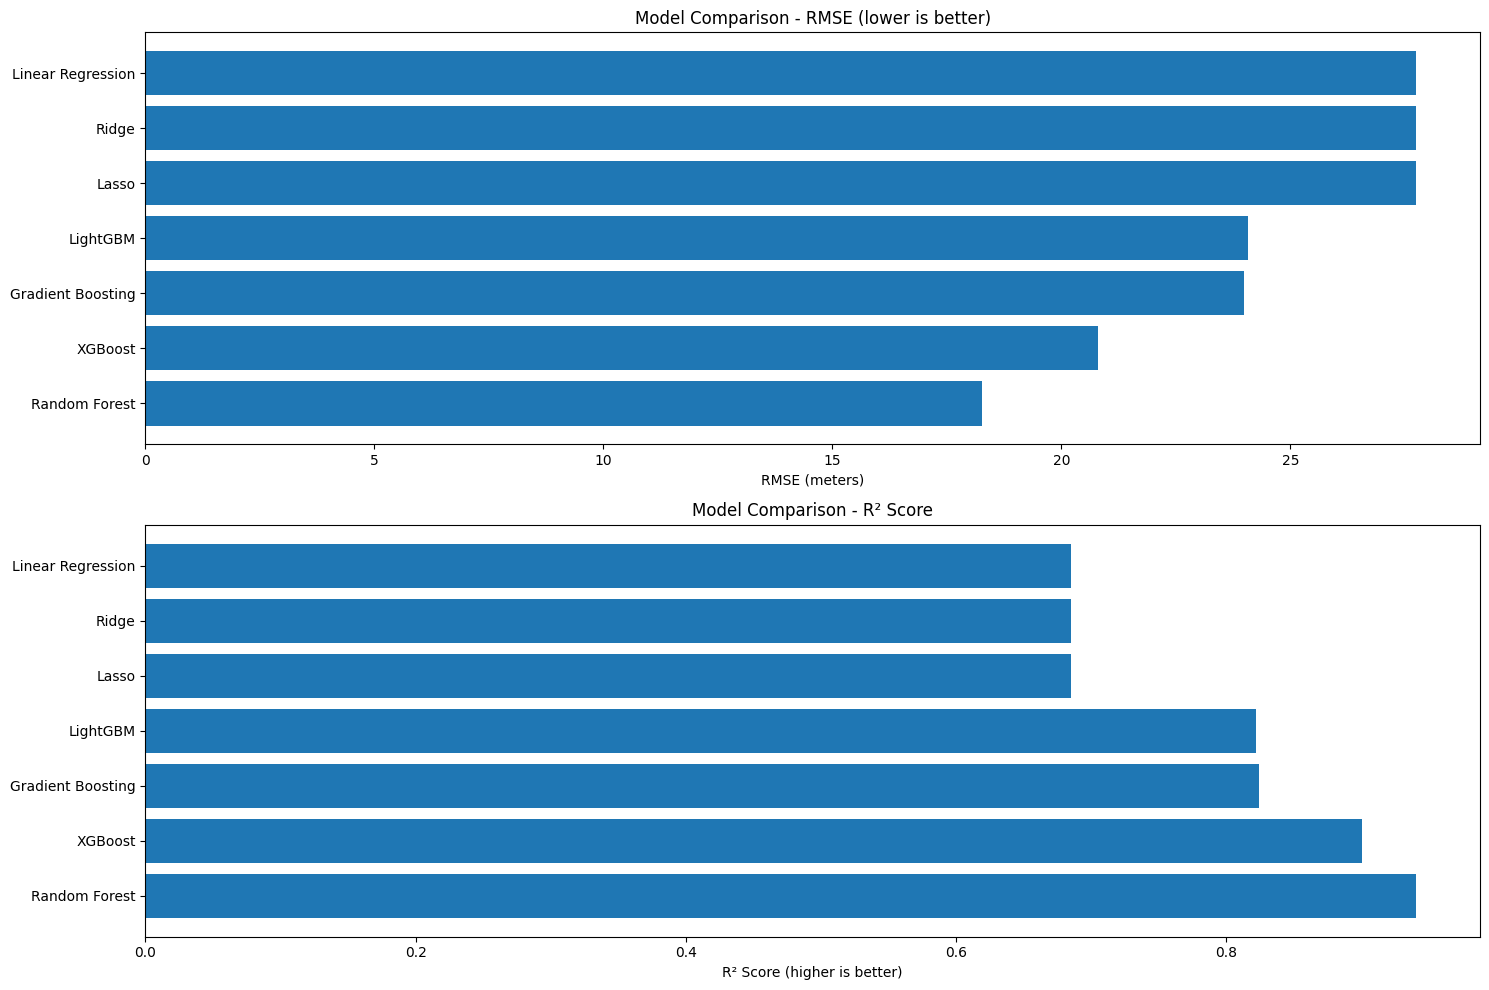

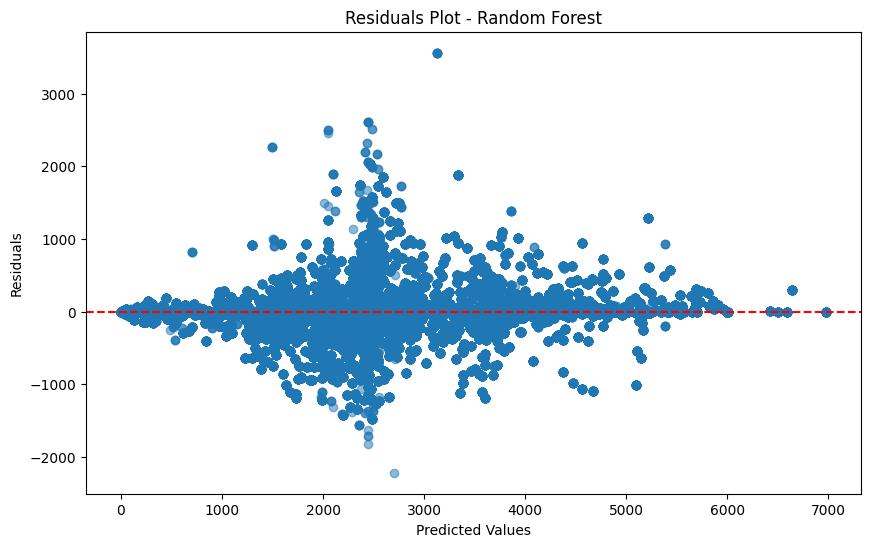


Summary of all models:
                        RMSE        R²     CV RMSE  CV RMSE Std
Random Forest      18.274636  0.940843  894.200641    21.926632
XGBoost            20.808807  0.900551  776.813774     8.185297
Gradient Boosting  23.985068  0.824460  728.116731     8.862379
LightGBM           24.078310  0.821715  730.863660    11.656318
Lasso              27.754115  0.685282  772.620495    16.974322
Ridge              27.754161  0.685280  772.616030    16.942025
Linear Regression  27.754161  0.685280  772.616040    16.942003


In [4]:


def compare_algorithms(races, features=['length', 'profile', 'startlist_quality', 'is_tarmac']):
    """
    Compare different algorithms for predicting climb_total values.
    
    Parameters:
    races (pd.DataFrame): Input DataFrame
    features (list): List of feature columns to use
    
    Returns:
    dict: Dictionary containing trained models and their performance metrics
    """
    # Prepare data
    known_mask = ~races['climb_total'].isna()
    train_data = races[known_mask]
    predict_data = races[~known_mask]
    
    X = train_data[features]
    y = train_data['climb_total']
    
    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to compare
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=100, max_depth=15, random_state=42, n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'XGBoost': XGBRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'LightGBM': LGBMRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        rmse = np.sqrt(mse(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Perform cross-validation
        cv_scores = cross_val_score(
            model, X_imputed, y, 
            cv=5, scoring='neg_root_mean_squared_error'
        )
        
        results[name] = {
            'model': model,
            'rmse': rmse,
            'r2': r2,
            'cv_rmse': -cv_scores.mean(),
            'cv_rmse_std': cv_scores.std(),
            'predictions': y_pred
        }
        
        print(f"{name} Results:")
        print(f"RMSE: {rmse:.2f} meters")
        print(f"R²: {r2:.3f}")
        print(f"CV RMSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f} meters")
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Plot RMSE comparison
    plt.subplot(2, 1, 1)
    rmse_scores = [(name, results[name]['rmse']) for name in results.keys()]
    rmse_scores.sort(key=lambda x: x[1])
    
    names, scores = zip(*rmse_scores)
    plt.barh(names, scores)
    plt.xlabel('RMSE (meters)')
    plt.title('Model Comparison - RMSE (lower is better)')
    
    # Plot R² comparison
    plt.subplot(2, 1, 2)
    r2_scores = [(name, results[name]['r2']) for name in results.keys()]
    r2_scores.sort(key=lambda x: x[1], reverse=True)
    
    names, scores = zip(*r2_scores)
    plt.barh(names, scores)
    plt.xlabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² Score')
    
    plt.tight_layout()
    plt.show()
    
    # Plot residuals for best model
    best_model_name = min(results.keys(), key=lambda k: results[k]['rmse'])
    best_predictions = results[best_model_name]['predictions']
    
    plt.figure(figsize=(10, 6))
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {best_model_name}')
    plt.show()
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'RMSE': [results[name]['rmse'] for name in models.keys()],
        'R²': [results[name]['r2'] for name in models.keys()],
        'CV RMSE': [results[name]['cv_rmse'] for name in models.keys()],
        'CV RMSE Std': [results[name]['cv_rmse_std'] for name in models.keys()]
    }, index=models.keys())
    
    print("\nSummary of all models:")
    print(summary.sort_values('RMSE'))
    
    return results, summary

# Example usage:
results, summary = compare_algorithms(races)

# Use the best model to make predictions
best_model_name = summary.index[0]
best_model = results[best_model_name]['model']


Training Random Forest...
Random Forest Results:
RMSE: 18.27 meters
R²: 0.941
CV RMSE: 894.20 ± 21.93 meters

Training Gradient Boosting...
Gradient Boosting Results:
RMSE: 23.99 meters
R²: 0.824
CV RMSE: 728.12 ± 8.86 meters

Training XGBoost...
XGBoost Results:
RMSE: 20.81 meters
R²: 0.901
CV RMSE: 776.81 ± 8.19 meters

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 354256, number of used features: 4
[LightGBM] [Info] Start training from score 2330.825770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

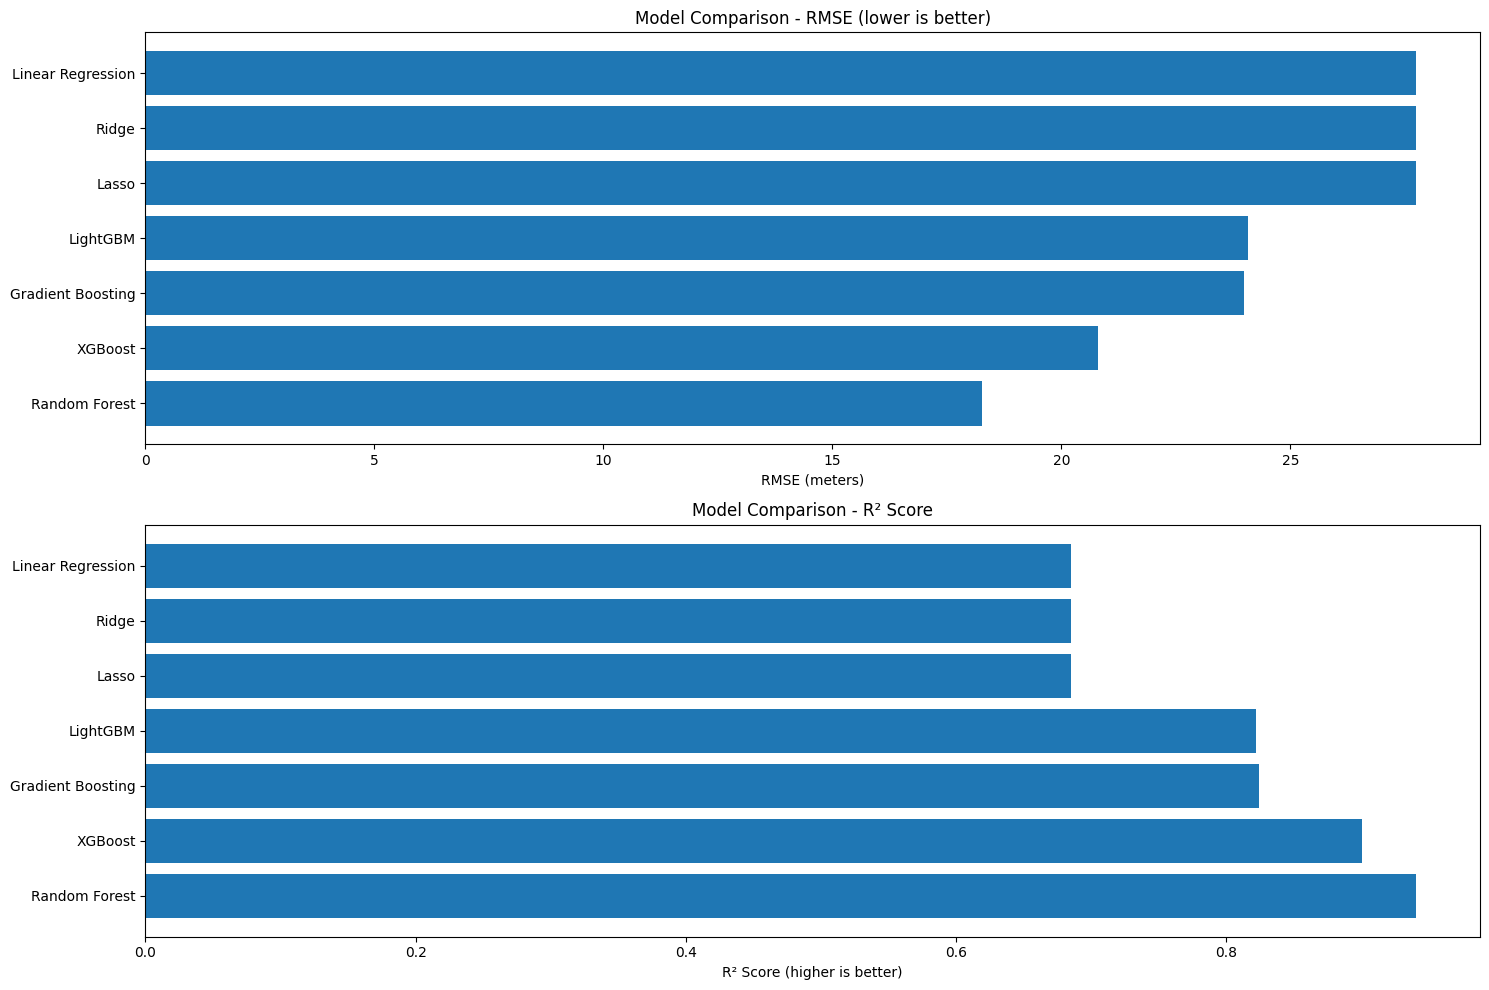

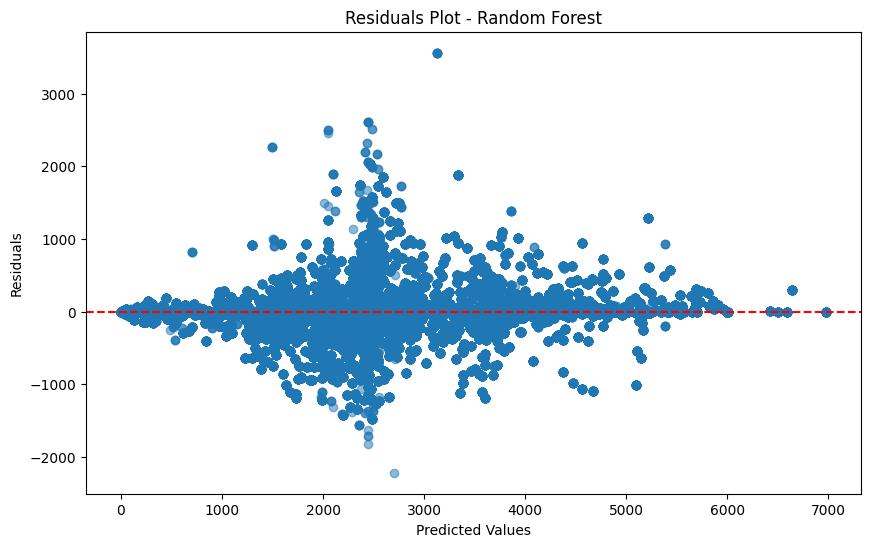


Summary of all models:
                        RMSE        R²     CV RMSE  CV RMSE Std
Random Forest      18.274636  0.940843  894.200641    21.926632
XGBoost            20.808807  0.900551  776.813774     8.185297
Gradient Boosting  23.985068  0.824460  728.116731     8.862379
LightGBM           24.078310  0.821715  730.863660    11.656318
Lasso              27.754115  0.685282  772.620495    16.974322
Ridge              27.754161  0.685280  772.616030    16.942025
Linear Regression  27.754161  0.685280  772.616040    16.942003


In [ ]:


def compare_algorithms(races, features=['length', 'profile', 'startlist_quality', 'is_tarmac']):
    """
    Compare different algorithms for predicting climb_total values.
    
    Parameters:
    races (pd.DataFrame): Input DataFrame
    features (list): List of feature columns to use
    
    Returns:
    dict: Dictionary containing trained models and their performance metrics
    """
    # Prepare data
    known_mask = ~races['climb_total'].isna()
    train_data = races[known_mask]
    predict_data = races[~known_mask]
    
    X = train_data[features]
    y = train_data['climb_total']
    
    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to compare
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=100, max_depth=15, random_state=42, n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'XGBoost': XGBRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'LightGBM': LGBMRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        rmse = np.sqrt(mse(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Perform cross-validation
        cv_scores = cross_val_score(
            model, X_imputed, y, 
            cv=5, scoring='neg_root_mean_squared_error'
        )
        
        results[name] = {
            'model': model,
            'rmse': rmse,
            'r2': r2,
            'cv_rmse': -cv_scores.mean(),
            'cv_rmse_std': cv_scores.std(),
            'predictions': y_pred
        }
        
        print(f"{name} Results:")
        print(f"RMSE: {rmse:.2f} meters")
        print(f"R²: {r2:.3f}")
        print(f"CV RMSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f} meters")
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Plot RMSE comparison
    plt.subplot(2, 1, 1)
    rmse_scores = [(name, results[name]['rmse']) for name in results.keys()]
    rmse_scores.sort(key=lambda x: x[1])
    
    names, scores = zip(*rmse_scores)
    plt.barh(names, scores)
    plt.xlabel('RMSE (meters)')
    plt.title('Model Comparison - RMSE (lower is better)')
    
    # Plot R² comparison
    plt.subplot(2, 1, 2)
    r2_scores = [(name, results[name]['r2']) for name in results.keys()]
    r2_scores.sort(key=lambda x: x[1], reverse=True)
    
    names, scores = zip(*r2_scores)
    plt.barh(names, scores)
    plt.xlabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² Score')
    
    plt.tight_layout()
    plt.show()
    
    # Plot residuals for best model
    best_model_name = min(results.keys(), key=lambda k: results[k]['rmse'])
    best_predictions = results[best_model_name]['predictions']
    
    plt.figure(figsize=(10, 6))
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {best_model_name}')
    plt.show()
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'RMSE': [results[name]['rmse'] for name in models.keys()],
        'R²': [results[name]['r2'] for name in models.keys()],
        'CV RMSE': [results[name]['cv_rmse'] for name in models.keys()],
        'CV RMSE Std': [results[name]['cv_rmse_std'] for name in models.keys()]
    }, index=models.keys())
    
    print("\nSummary of all models:")
    print(summary.sort_values('RMSE'))
    
    return results, summary

# Example usage:
results, summary = compare_algorithms(races)

# Use the best model to make predictions
best_model_name = summary.index[0]
best_model = results[best_model_name]['model']

In [14]:
tqdm.pandas()  # Enable progress_apply
from scipy.stats import kstest

def fit_best_distribution(data):
    """
    Try multiple distributions and return the best fitting one
    
    Parameters:
    data (array-like): Data to fit distributions to
    
    Returns:
    tuple: (distribution name, distribution parameters, fit score)
    """
    distributions = [
        ('gamma', stats.gamma),
        ('lognorm', stats.lognorm),
        ('weibull_min', stats.weibull_min),
        ('beta', stats.beta),
        ('burr', stats.burr),
        ('burr12', stats.burr12)
    ]
    
    best_fit = None
    best_ks_score = float('inf')

    if len(data) < 2 or data.max() == data.min():
        return best_fit
    
    data = data[data > 1e-10]

    if len(data) == 0:
        return best_fit
    
    
    data_normalized = (data - data.min()) / (data.max() - data.min())
    data_normalized = np.clip(data_normalized, 1e-10, 1 - 1e-10)
    
    for name, distribution in distributions:
        try:
            if name == 'beta':
                params = distribution.fit(data_normalized)
            else:
                params = distribution.fit(data)
                
            if name == 'beta':
                ks_stat, p_value = kstest(data_normalized, name, params)
            else:
                ks_stat, p_value = kstest(data, name, params)
            
            if ks_stat < best_ks_score:
                best_fit = (name, params, ks_stat)
                best_ks_score = ks_stat
                
        except Exception as e:
            continue
    
    return best_fit

def create_feature_matrix(df, segmentation_features):
    """
    Create a feature matrix for segmentation using specified features
    
    Parameters:
    df (pd.DataFrame): Input dataframe
    segmentation_features (list): List of features to use for segmentation
    
    Returns:
    np.array: Normalized feature matrix
    """
    feature_matrix = []
    scaler = StandardScaler()
    
    for feature in segmentation_features:
        if feature in ['is_tarmac']:
            # Boolean features are already 0/1
            feature_matrix.append(df[feature].astype(float))
        elif feature in ['length', 'month', 'startlist_quality']:
            # Scale numerical features
            scaled_feature = scaler.fit_transform(df[feature].values.reshape(-1, 1)).flatten()
            feature_matrix.append(scaled_feature)
            
    return np.column_stack(feature_matrix)

def predict_climb_total(races_df):
    """
    Predict missing climb_total values using data segmentation and multiple probability distributions
    
    Parameters:
    races_df (pd.DataFrame): The input races dataframe
    
    Returns:
    pd.DataFrame: DataFrame with predicted climb_total values and fit information
    """
    df = races_df.copy()
    
    # 1. Feature preparation
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    
    # Define segmentation features
    segmentation_features = [
        'length',
        'month',
        'startlist_quality',
        'is_tarmac',
        
    ]
    
    # 2. Create feature matrix for segmentation
    feature_matrix = create_feature_matrix(df, segmentation_features)
    
    # 3. Use K-means clustering for sophisticated segmentation
    n_clusters = min(20, len(df) // 1000)  # Adaptive number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['segment_cluster'] = kmeans.fit_predict(feature_matrix)
    
    # 4. Combine clustering with domain-specific segments
    def create_segment_id(row):
        # Create length category dynamically
        length_category = pd.qcut(df['length'], q=5, labels=['VS', 'S', 'M', 'L', 'VL']).loc[row.name]
        
        # Determine road type using all surface features
        if row['is_tarmac']:
            road_type = 'T'
        else:
            road_type = 'M'  # Mixed or other
            
        season = 'Spring' if row['month'] <= 4 else ('Summer' if row['month'] <= 8 else 'Fall')
        quality_level = 'High' if row['startlist_quality'] > df['startlist_quality'].median() else 'Low'
        
        # Combine all segmentation aspects
        return f"{length_category}_{road_type}_{season}_{quality_level}_C{row['segment_cluster']}"
    
    df['segment'] = df.progress_apply(create_segment_id, axis=1)  # Progress bar added here
    
    # 5. Calculate distributions for each segment
    segment_distributions = {}
    distribution_info = {}
    
    for segment in tqdm(df['segment'].unique(), desc="Fitting Distributions"):
        segment_data = df[df['segment'] == segment]['climb_total'].dropna()
        if len(segment_data) > 20:
            best_fit = fit_best_distribution(segment_data)
            if best_fit is not None:
                dist_name, params, ks_score = best_fit
                segment_distributions[segment] = (dist_name, params)
                distribution_info[segment] = {
                    'distribution': dist_name,
                    'ks_score': ks_score,
                    'sample_size': len(segment_data),
                    'feature_means': {
                        feature: df[df['segment'] == segment][feature].mean()
                        for feature in segmentation_features if feature in df.columns
                    }
                }
    
    # 6. Predict missing values
    def predict_climb(row):
        if pd.isna(row['climb_total']):
            segment = row['segment']
            if segment in segment_distributions:
                dist_name, params = segment_distributions[segment]
                distribution = getattr(stats, dist_name)
                
                if dist_name == 'beta':
                    segment_data = df[df['segment'] == segment]['climb_total'].dropna()
                    min_val, max_val = segment_data.min(), segment_data.max()
                    prediction = distribution.mean(*params) * (max_val - min_val) + min_val
                else:
                    prediction = distribution.mean(*params)
                
                return prediction
            else:
                # Find most similar segment based on feature similarity
                segment_features = feature_matrix[row.name]
                best_similarity = float('-inf')
                best_prediction = df['climb_total'].mean()
                
                for seg, info in distribution_info.items():
                    seg_means = np.array([info['feature_means'].get(f, 0) for f in segmentation_features])
                    similarity = -np.sum((segment_features - seg_means) ** 2)
                    
                    if similarity > best_similarity:
                        best_similarity = similarity
                        dist_name, params = segment_distributions[seg]
                        distribution = getattr(stats, dist_name)
                        best_prediction = distribution.mean(*params)
                
                return best_prediction
        return row['climb_total']
    
    # Adding a progress bar to the prediction step
    df['climb_total_predicted'] = df.progress_apply(predict_climb, axis=1)
    
    # 7. Calculate prediction confidence
    def calculate_confidence(row):
        segment = row['segment']
        if segment in distribution_info:
            info = distribution_info[segment]
            ks_confidence = 1 / (1 + info['ks_score'])
            sample_confidence = min(1, info['sample_size'] / 100)
            feature_similarity = np.mean([info['feature_means'].get(f, 0) for f in segmentation_features])
            return (ks_confidence + sample_confidence + feature_similarity) / 3
        return 0
    
    df['prediction_confidence'] = df.progress_apply(calculate_confidence, axis=1)
    df['distribution_used'] = df['segment'].map(lambda x: distribution_info.get(x, {}).get('distribution', 'none'))
    
    # 8. Create summary statistics
    summary_stats = {
        'total_missing': df['climb_total'].isna().sum(),
        'segments_created': len(df['segment'].unique()),
        'segments_with_distribution': len(segment_distributions),
        'distribution_usage': pd.Series([info['distribution'] for info in distribution_info.values()]).value_counts().to_dict(),
        'mean_confidence': df['prediction_confidence'].mean(),
        'median_predicted_climb': df['climb_total_predicted'].median(),
        'features_used': segmentation_features,
        'feature_importance': {
            feature: abs(np.corrcoef(feature_matrix[:, i], 
                                   df['climb_total'].fillna(df['climb_total'].mean()))[0, 1])
            for i, feature in enumerate(segmentation_features)
        }
    }
    
    return df[['climb_total', 'climb_total_predicted', 'prediction_confidence', 
              'segment', 'distribution_used']], summary_stats

predictions, stats = predict_climb_total(races.head(10000))

# View feature importance
print("Feature importance:")
print(stats['feature_importance'])

# View segments and their predictions
print("\nSample predictions by segment:")
predictions_summary = predictions.groupby('segment').agg({
    'climb_total_predicted': ['mean', 'count'],
    'prediction_confidence': 'mean'
}).head()
print(predictions_summary)

100%|██████████| 1000/1000 [00:00<00:00, 320665.44it/s]


Feature importance:
length: 0.398
month: 0.572
startlist_quality: 0.550
is_tarmac: nan

Prediction statistics:
Total missing values: 119
Mean prediction confidence: 0.000
Median predicted climb: 2924.81

Distribution usage:



/home/lesi-nedo/miniforge3/envs/DM/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/lesi-nedo/miniforge3/envs/DM/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:


def create_prediction_visualizations(df, summary_stats, save_path=None):
    """
    Create comprehensive visualizations for the prediction results
    
    Parameters:
    df (pd.DataFrame): DataFrame containing predictions and actual values
    summary_stats (dict): Dictionary containing summary statistics
    save_path (str, optional): Path to save the plots. If None, plots are displayed
    
    Returns:
    None
    """
    # Set up the style
    plt.style.use('seaborn')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 25))
    gs = plt.GridSpec(5, 2, figure=fig)
    
    # 1. Distribution Comparison Plot
    ax1 = fig.add_subplot(gs[0, 0])
    actual_data = df['climb_total'].dropna()
    predicted_data = df['climb_total_predicted'].dropna()
    
    sns.kdeplot(data=actual_data, label='Actual', ax=ax1)
    sns.kdeplot(data=predicted_data, label='Predicted', ax=ax1)
    ax1.set_title('Distribution of Actual vs Predicted Climb Total')
    ax1.set_xlabel('Climb Total (meters)')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # 2. Scatter Plot with Perfect Prediction Line
    ax2 = fig.add_subplot(gs[0, 1])
    mask = ~df['climb_total'].isna()
    ax2.scatter(df[mask]['climb_total'], 
               df[mask]['climb_total_predicted'], tqdm.pandas()  # Enable progress_apply

               alpha=0.5)
    
    # Add perfect prediction line
    min_val = min(df[mask]['climb_total'].min(), 
                 df[mask]['climb_total_predicted'].min())
    max_val = max(df[mask]['climb_total'].max(), 
                 df[mask]['climb_total_predicted'].max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    ax2.set_title('Actual vs Predicted Climb Total')
    ax2.set_xlabel('Actual Climb Total (meters)')
    ax2.set_ylabel('Predicted Climb Total (meters)')
    ax2.legend()
    
    # 3. Prediction Confidence Distribution
    ax3 = fig.add_subplot(gs[1, 0])
    sns.histplot(data=df['prediction_confidence'], bins=50, ax=ax3)
    ax3.set_title('Distribution of Prediction Confidence')
    ax3.set_xlabel('Confidence Score')
    ax3.set_ylabel('Count')
    
    # 4. Distribution Usage Pie Chart
    ax4 = fig.add_subplot(gs[1, 1])
    dist_usage = pd.Series(summary_stats['distribution_usage'])
    ax4.pie(dist_usage.values, labels=dist_usage.index, autopct='%1.1f%%')
    ax4.set_title('Distribution Types Used in Predictions')
    
    # 5. Feature Importance Plot
    ax5 = fig.add_subplot(gs[2, 0])
    feature_importance = pd.Series(summary_stats['feature_importance'])
    feature_importance.sort_values().plot(kind='barh', ax=ax5)
    ax5.set_title('Feature Importance in Prediction')
    ax5.set_xlabel('Absolute Correlation with Climb Total')
    
    # 6. Prediction Error Distribution
    ax6 = fig.add_subplot(gs[2, 1])
    error = df[mask]['climb_total_predicted'] - df[mask]['climb_total']
    sns.histplot(data=error, bins=50, ax=ax6)
    ax6.axvline(x=0, color='r', linestyle='--', label='Zero Error')
    ax6.set_title('Distribution of Prediction Errors')
    ax6.set_xlabel('Prediction Error (meters)')
    ax6.set_ylabel('Count')
    ax6.legend()
    
    # 7. Confidence vs Error Plot
    ax7 = fig.add_subplot(gs[3, 0])
    abs_error = abs(error)
    ax7.scatter(df[mask]['prediction_confidence'], abs_error, alpha=0.5)
    ax7.set_title('Prediction Confidence vs Absolute Error')
    ax7.set_xlabel('Confidence Score')
    ax7.set_ylabel('Absolute Error (meters)')
    
    # 8. Segment Performance
    ax8 = fig.add_subplot(gs[3, 1])
    segment_performance = df[mask].groupby('segment').apply(
        lambda x: np.mean(abs(x['climb_total_predicted'] - x['climb_total']))
    ).sort_values()
    segment_performance.head(20).plot(kind='barh', ax=ax8)
    ax8.set_title('Top 20 Best Performing Segments')
    ax8.set_xlabel('Mean Absolute Error (meters)')
    
    # 9. Q-Q Plot of Prediction Errors
    ax9 = fig.add_subplot(gs[4, 0])
    stats.probplot(error, dist="norm", plot=ax9)
    ax9.set_title('Q-Q Plot of Prediction Errors')
    
    # 10. Error vs Actual Value
    ax10 = fig.add_subplot(gs[4, 1])
    ax10.scatter(df[mask]['climb_total'], error, alpha=0.5)
    ax10.axhline(y=0, color='r', linestyle='--', label='Zero Error')
    ax10.set_title('Prediction Error vs Actual Climb Total')
    ax10.set_xlabel('Actual Climb Total (meters)')
    ax10.set_ylabel('Prediction Error (meters)')
    ax10.legend()
    
    # Adjust layout and display/save
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def create_segment_analysis(df, save_path=None):
    """
    Create detailed visualizations for segment analysis
    
    Parameters:
    df (pd.DataFrame): DataFrame containing predictions and segment information
    save_path (str, optional): Path to save the plots. If None, plots are displayed
    
    Returns:
    None
    """
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(20, 15))
    gs = plt.GridSpec(2, 2, figure=fig)
    
    # 1. Segment Size Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    segment_sizes = df.groupby('segment').size().sort_values(ascending=False)
    segment_sizes.head(20).plot(kind='bar', ax=ax1)
    ax1.set_title('Top 20 Largest Segments')
    ax1.set_xlabel('Segment')
    ax1.set_ylabel('Number of Races')
    plt.xticks(rotation=45)
    
    # 2. Segment Confidence Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    segment_confidence = df.groupby('segment')['prediction_confidence'].mean().sort_values(ascending=False)
    segment_confidence.head(20).plot(kind='bar', ax=ax2)
    ax2.set_title('Top 20 Segments by Confidence')
    ax2.set_xlabel('Segment')
    ax2.set_ylabel('Mean Confidence Score')
    plt.xticks(rotation=45)
    
    # 3. Distribution Type by Segment Size
    ax3 = fig.add_subplot(gs[1, 0])
    dist_by_size = df.groupby(['distribution_used', pd.qcut(segment_sizes, q=5)])['segment'].count().unstack()
    dist_by_size.plot(kind='bar', stacked=True, ax=ax3)
    ax3.set_title('Distribution Types by Segment Size Quintile')
    ax3.set_xlabel('Distribution Type')
    ax3.set_ylabel('Number of Segments')
    plt.xticks(rotation=45)
    
    # 4. Prediction Range by Segment
    ax4 = fig.add_subplot(gs[1, 1])
    segment_ranges = df.groupby('segment').agg({
        'climb_total_predicted': ['mean', 'std']
    }).sort_values(('climb_total_predicted', 'mean'), ascending=False)
    
    segment_ranges.head(20)[('climb_total_predicted', 'mean')].plot(
        kind='bar', 
        yerr=segment_ranges.head(20)[('climb_total_predicted', 'std')],
        ax=ax4
    )
    ax4.set_title('Top 20 Segments by Mean Predicted Climb')
    ax4.set_xlabel('Segment')
    ax4.set_ylabel('Mean Predicted Climb Total (meters)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def plot_interactive_analysis(df):
    """
    Create interactive plots for detailed analysis
    Note: This requires running in a Jupyter notebook with interactive backend enabled
    """
    def update_segment_plot(segment):
        plt.figure(figsize=(12, 6))
        segment_data = df[df['segment'] == segment]
        mask = ~segment_data['climb_total'].isna()
        
        plt.scatter(segment_data[mask]['climb_total'], 
                   segment_data[mask]['climb_total_predicted'],
                   alpha=0.5)
        
        min_val = min(segment_data[mask]['climb_total'].min(),
                     segment_data[mask]['climb_total_predicted'].min())
        max_val = max(segment_data[mask]['climb_total'].max(),
                     segment_data[mask]['climb_total_predicted'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', 
                 label='Perfect Prediction')
        
        plt.title(f'Actual vs Predicted Climb Total for Segment: {segment}')
        plt.xlabel('Actual Climb Total (meters)')
        plt.ylabel('Predicted Climb Total (meters)')
        plt.legend()
        plt.show()
    
    from ipywidgets import interact
    interact(update_segment_plot, 
            segment=df['segment'].unique())

# Usage example:
"""
# After running predictions
predictions, stats = predict_climb_total(races)

# Create all visualizations
create_prediction_visualizations(predictions, stats)
create_segment_analysis(predictions)

# For interactive analysis in Jupyter notebook:
%matplotlib inline
plot_interactive_analysis(predictions)
"""